In [2]:
import pandas as pd

df = pd.read_csv("SpotifyFeatures.csv")

# 🔥 ADD THIS LINE HERE
df = df.head(10000)


In [3]:
df.head()
df.shape


(10000, 18)

In [4]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.head()
numeric_df.shape


(10000, 11)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


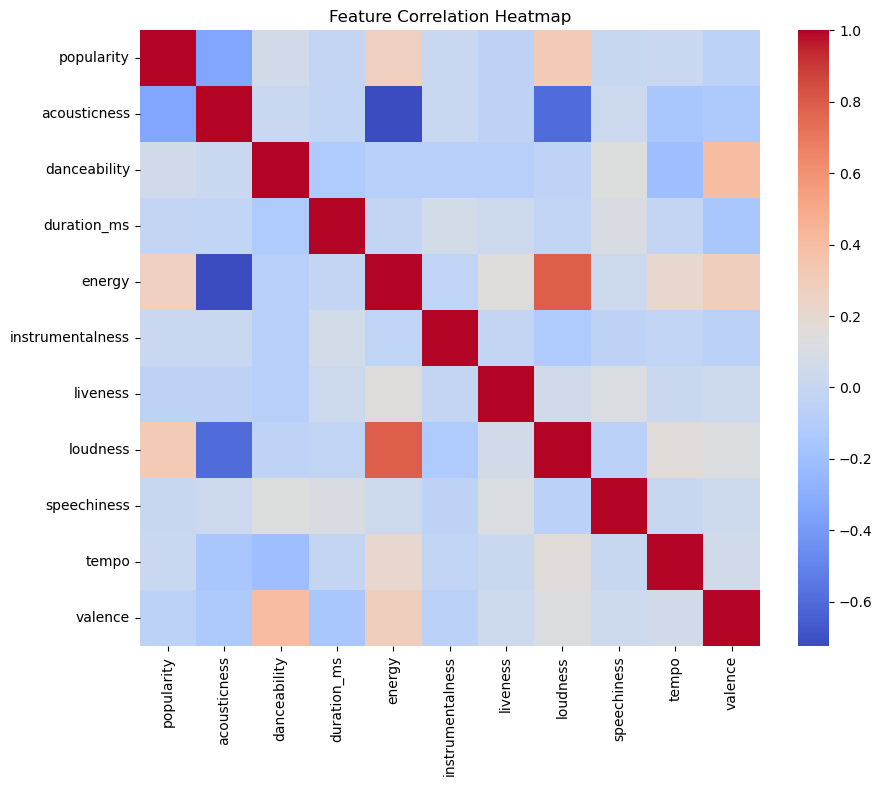

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


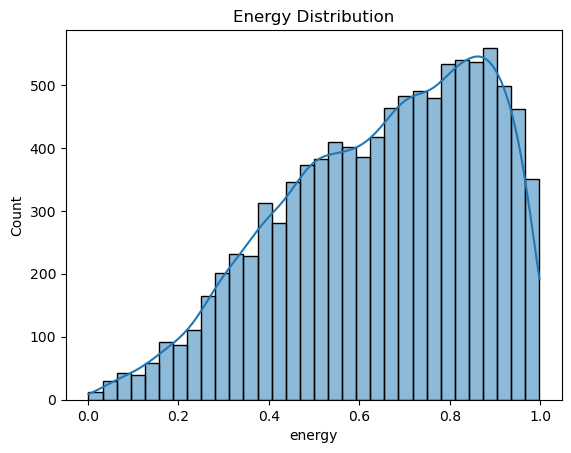

In [8]:
sns.histplot(df['energy'], kde=True)
plt.title("Energy Distribution")
plt.show()


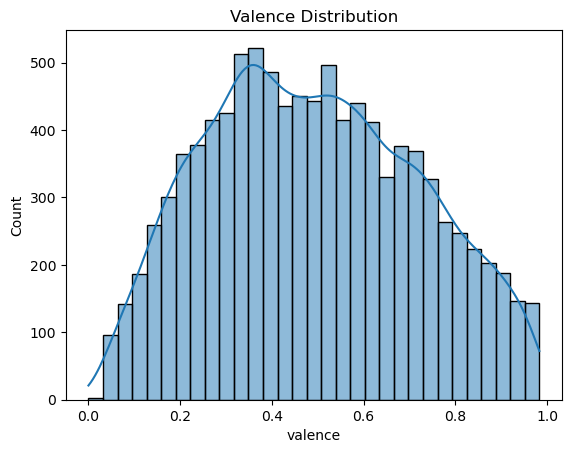

In [9]:
sns.histplot(df['valence'], kde=True)
plt.title("Valence Distribution")
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)
scaled


array([[-3.18607796e+00,  1.28355102e+00, -1.22378103e+00, ...,
        -2.49853447e-01,  1.49890955e+00,  1.42306223e+00],
       [-3.11676296e+00,  2.16807942e-03,  2.16266479e-01, ...,
         1.21560876e-01,  1.73189423e+00,  1.43182794e+00],
       [-2.97813295e+00,  2.48067865e+00,  7.39268809e-01, ...,
        -4.26356464e-01, -7.36239596e-01, -5.31691354e-01],
       ...,
       [ 7.17271647e-02,  1.09397656e+00, -2.05485323e+00, ...,
        -3.63551709e-01, -1.22380492e+00, -9.39296922e-01],
       [ 3.48987175e-01, -8.02119133e-01, -6.00476886e-01, ...,
         4.59585820e+00, -8.77242692e-01, -1.76721834e+00],
       [-2.05532846e-01, -8.14406366e-01,  6.96282316e-01, ...,
        -3.99285449e-01, -5.56686284e-02,  1.04613665e+00]])

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(scaled)
similarity.shape


(10000, 10000)

In [12]:
def recommend(track_name, n=10):
    # Find index of the track
    if track_name not in df['track_name'].values:
        return "Track not found in dataset."
    
    idx = df[df['track_name'] == track_name].index[0]
    
    # Get similarity scores for this track
    scores = list(enumerate(similarity[idx]))
    
    # Sort by similarity (highest first)
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    
    # Take top N similar tracks (skip the first one because it's itself)
    recommended_indices = [i[0] for i in scores[1:n+1]]
    
    return df[['track_name','artist_name','genre']].iloc[recommended_indices]


In [13]:
recommend(df['track_name'].iloc[0])


,track_name,artist_name,genre
512,Twist De L'enrhumé - Remastered,Henri Salvador,Movie
433,Sharivan,Bernard Minet,Movie
8933,Yeah Yeah Yeah,Dustin Lynch,Country
503,Shurato,Bernard Minet,Movie
448,Jaspion,Bernard Minet,Movie
7746,Counterfeit,Smithfield,Country
605,Part Time Lover,Hyannis Sound,A Capella
506,La vérité si je mange (de la bouffe en gros),Les Hérissons,Movie
7903,Sounds So Good,Ashton Shepherd,Country
111,Mabrouka Ananas ma Nana,Les Hérissons,Movie
